## Model 3 - data 3 - fraud3_after_balancing dataset

Model 3a: Logistic Regression\
Model 3b: Naives Bayes
Model 3c: ANN

Using the balanced dataset

By undersampling so is-fraud and non-fraud transactions are 50/50 to fix the huge imbalance issue 0.13% vs 99.87%

Shape: (16336, 12) which is 0.26% of original dataset

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix


In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv("fraud3_after_balancing.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,354,CASH_IN,260012.02,C544176471,5199053.93,5459065.95,C321290795,755473.56,495461.54,0,0
1,155,CASH_OUT,43098.67,C1761157771,85975.00,42876.33,C394115025,0.00,43098.67,0,0
2,129,CASH_IN,271158.11,C1672086699,6481157.15,6752315.26,C1921731690,17747883.77,17476725.66,0,0
3,466,CASH_OUT,88781.48,C846693684,158051.00,69269.52,C932961272,0.00,88781.48,0,0
4,19,PAYMENT,20873.25,C1919075712,164045.26,143172.01,M617611303,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16331,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0
16332,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.00,0.00,1,0
16333,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0
16334,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0


In [4]:
df.shape

(16336, 11)

In [5]:
## separating variables
num_col=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
cat_col = ['type','nameOrig','nameDest']
encoded_col = ['isFraud','isFlaggedFraud']

## Exploratory analysis

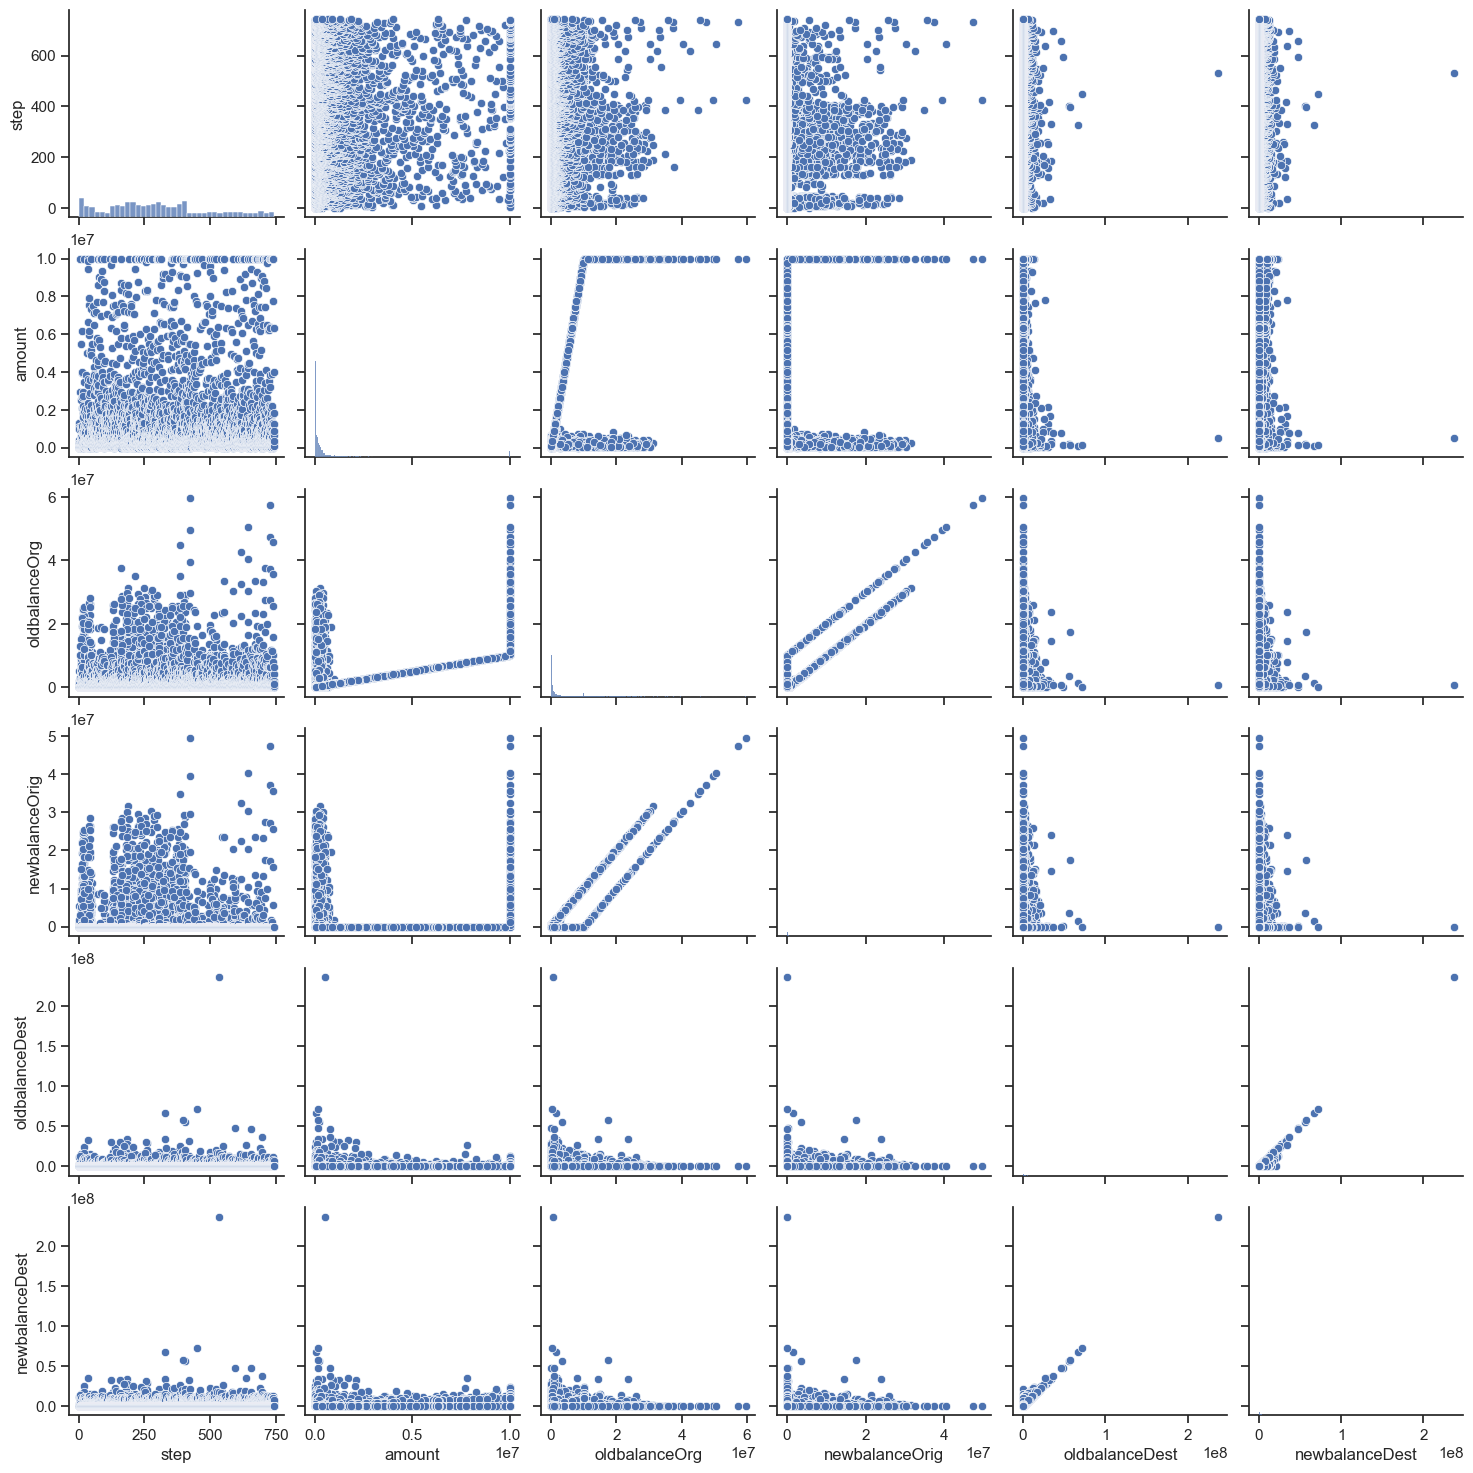

In [6]:
## inital pairplot visualisation to see overall dsitribution or relationship
sns.set_theme(style="ticks")
sns.pairplot(df.loc[:,num_col])

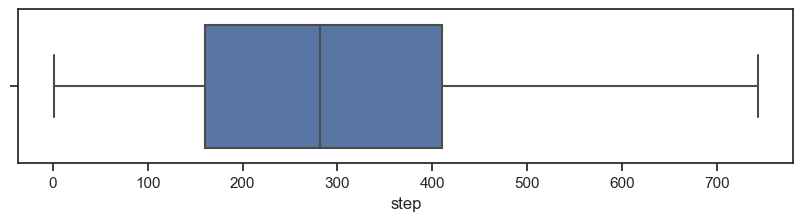

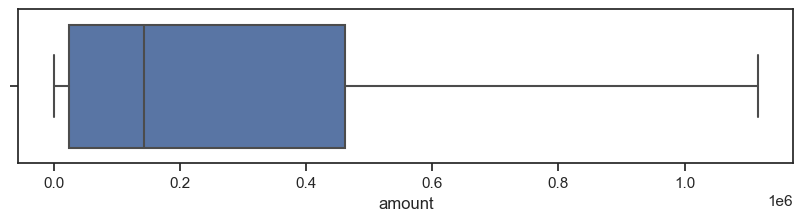

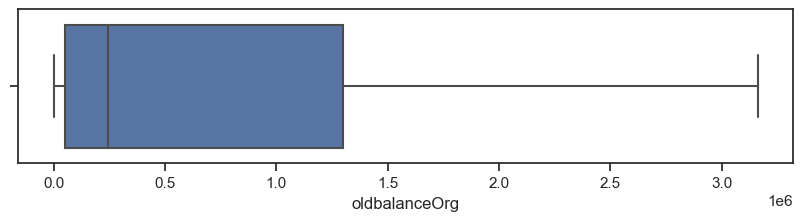

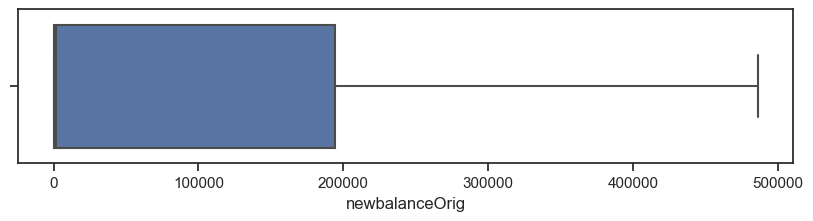

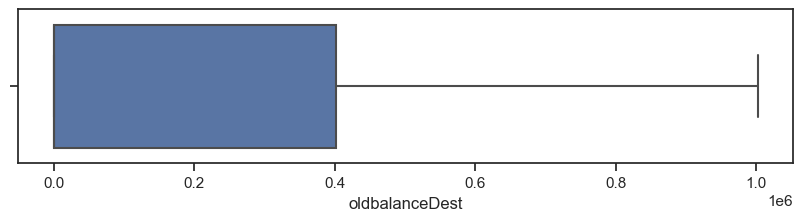

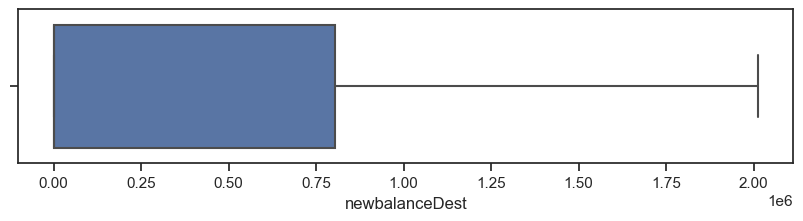

In [7]:
## explore distribution of each characteristic using boxplots without outliers
for column in num_col:
    plt.figure(figsize=(10,2))
    #df.boxplot([column])
    sns.boxplot(data=df, x=column, showfliers = False)

<function matplotlib.pyplot.show(close=None, block=None)>

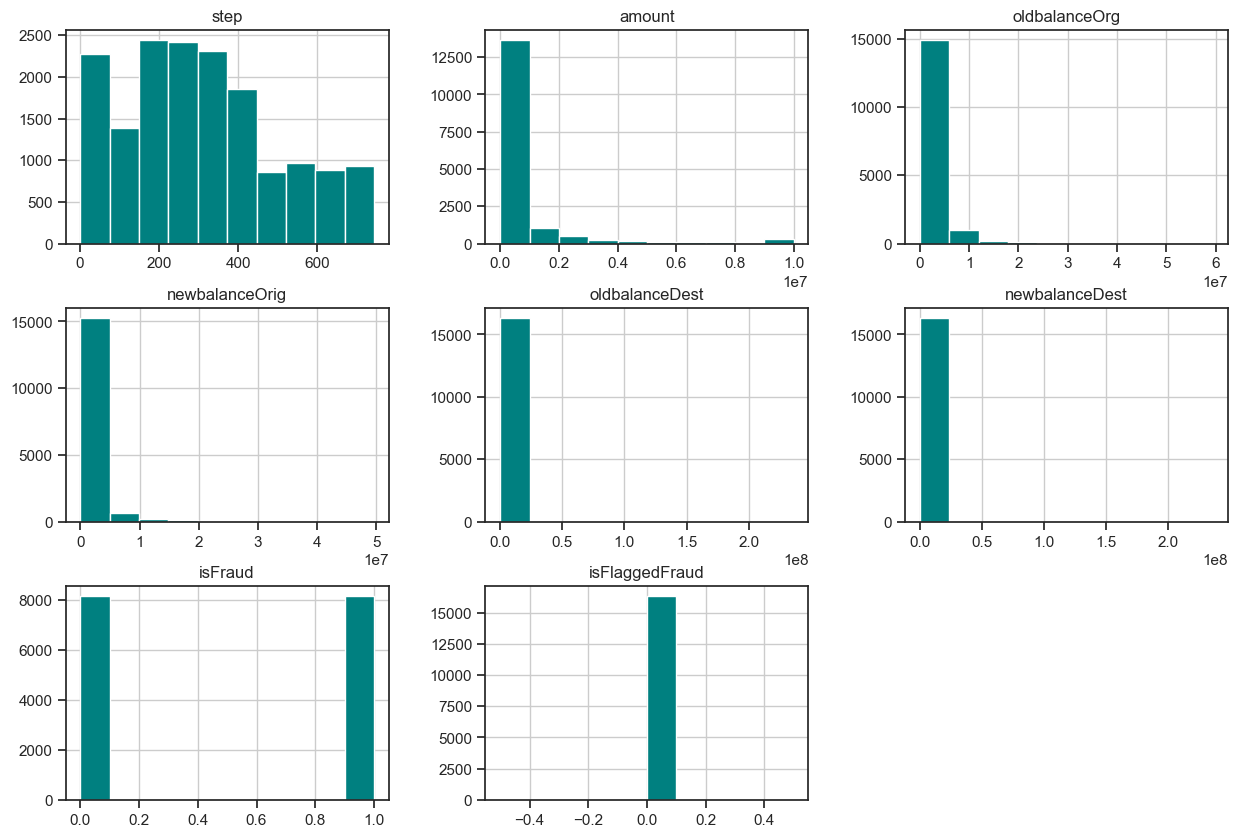

In [8]:
## histogram of each variables
df.hist(bins=10, figsize=(15,10), color='teal')
plt.show

/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_93923/3769656371.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(x)}' for x in vals])


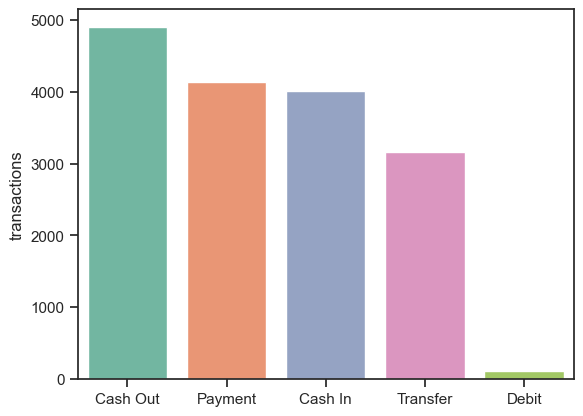

In [9]:
## Countplot of number of transactions per type 

ax = sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette = 'Set2')
ax.set_xticklabels(['Cash Out','Payment','Cash In','Transfer', 'Debit'])
vals = ax.get_yticks()
ax.set_yticklabels([f'{int(x)}' for x in vals])
ax.set_ylabel('transactions')
ax.set_xlabel(None)
plt.show()

/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_93923/3654539085.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  fraud_ax.set_yticklabels([f'{int(x)}' for x in fraud_vals])


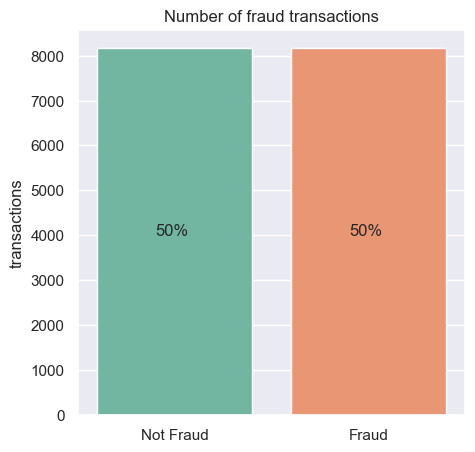

In [10]:
##Barplot of number of fraud transactions


## dataframe of count of flaggedfraud that are actualy fraud or not 

df_sub_fraud = df.groupby(['isFlaggedFraud',"isFraud"]).size().reset_index(name="Count")
df_sub_fraud['Percentage'] = round(df_sub_fraud['Count'] *100/ len(df),1)
df_sub_fraud

## selecting the percentage value to put in the barplot 
non_fraud_value = df_sub_fraud.iloc[0]['Percentage']
fraud_value = df_sub_fraud.iloc[1]['Percentage']

plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
fraud_ax = sns.countplot(data=df,x='isFraud',palette = 'Set2')
fraud_ax.set_title('Number of fraud transactions')
fraud_ax.set( xlabel= None, ylabel= None)
fraud_vals = fraud_ax.get_yticks()
fraud_ax.set_yticklabels([f'{int(x)}' for x in fraud_vals])
fraud_ax.set_ylabel('transactions')
fraud_ax.set_xticklabels(['Not Fraud', 'Fraud'])
plt.text(y= 4000, x=-0.1, s=f'{int(non_fraud_value)}%')
plt.text(y=4000, x=0.9, s=f'{int(fraud_value)}%')


plt.show()

/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_93923/1994833326.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(time_trans, ax=ax, palette = 'Set2')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


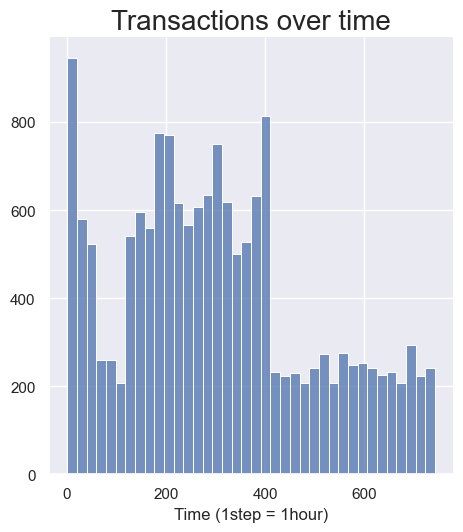

In [11]:
time_trans = df['step'].values
sns.displot(time_trans, ax=ax, palette = 'Set2')
plt.title('Transactions over time', fontsize = 20)
ax.set_xlim([min(time_trans), max(time_trans)])
plt.xlabel('Time (1step = 1hour)')
plt.ylabel(None)

plt.show()

## Cleaning the dataset

In [12]:
##dropping 'nameOrig' and 'nameDest' as they are ID's of the sender and recipient which are not useful for the model
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [13]:
## replacing outliers with median 

for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UB = Q3 + 1.5* IQR #1280.25 upper bound for outliers
    LB = Q1 - 1.5* IQR #lowe upper bound for outliers
    df[col] = np.where(df[col] > UB, int(df[col].median()),df[col])
    df[col] = np.where(df[col] < LB, int(df[col].median()),df[col])
    #df.drop(df[df[col] < LB].index, inplace=True)
    #df.drop(df[df[col] > UB].index, inplace=True)

In [14]:
## One-hot encoding on 'type' column to turn it into numerical values, instead of label encoding 
## too avoid the model misunderstand the data to be in some kind of order, 0 < 1 <2
df=pd.get_dummies(data=df,columns=['type'],drop_first=True)

## changing booleans of encoded 'type' data to 0/1
zero_one = {False:0, True:1}
type_encoded = ['type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']
for i in type_encoded:
    df[i] = df[i].map(zero_one)

In [15]:
## moving target variable'isFraud' as the last column to split easier intp train, split later on
df = df[ [ col for col in df.columns if col != 'isFraud' ] + ['isFraud'] ]

In [16]:
# We are using RobustScaler to scale down the numerical features as RobustScaler is less prone to outliers
scale = RobustScaler()
for feature in num_col:
    df[feature]=scale.fit_transform(df[feature].values.reshape(-1, 1))
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,0.289157,0.603591,0.000000,0.000053,21.235081,2.415038,0,0,0,0,0,0
1,-0.510040,-0.518531,-0.409952,1.269036,0.000000,0.205926,0,1,0,0,0,0
2,-0.614458,0.661251,0.000000,0.000053,0.000000,0.000054,0,0,0,0,0,0
3,0.738956,-0.282207,-0.221814,2.087578,0.000000,0.429018,0,1,0,0,0,0
4,-1.056225,-0.633506,-0.206167,4.379541,0.000000,-0.004546,0,0,0,1,0,0


In [17]:
## the cleaned data
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,0.289157,0.603591,0.000000,0.000053,21.235081,2.415038,0,0,0,0,0,0
1,-0.510040,-0.518531,-0.409952,1.269036,0.000000,0.205926,0,1,0,0,0,0
2,-0.614458,0.661251,0.000000,0.000053,0.000000,0.000054,0,0,0,0,0,0
3,0.738956,-0.282207,-0.221814,2.087578,0.000000,0.429018,0,1,0,0,0,0
4,-1.056225,-0.633506,-0.206167,4.379541,0.000000,-0.004546,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16331,1.847390,-0.413421,-0.468835,-0.060702,0.000000,-0.004546,0,0,0,0,1,1
16332,1.851406,0.000010,2.651497,-0.060702,0.000000,-0.004546,0,0,0,0,1,1
16333,1.851406,1.015735,0.252294,-0.060702,0.000000,-0.004546,0,0,0,0,1,1
16334,1.851406,0.000010,0.000000,-0.060702,0.000000,-0.004546,0,0,0,0,1,1


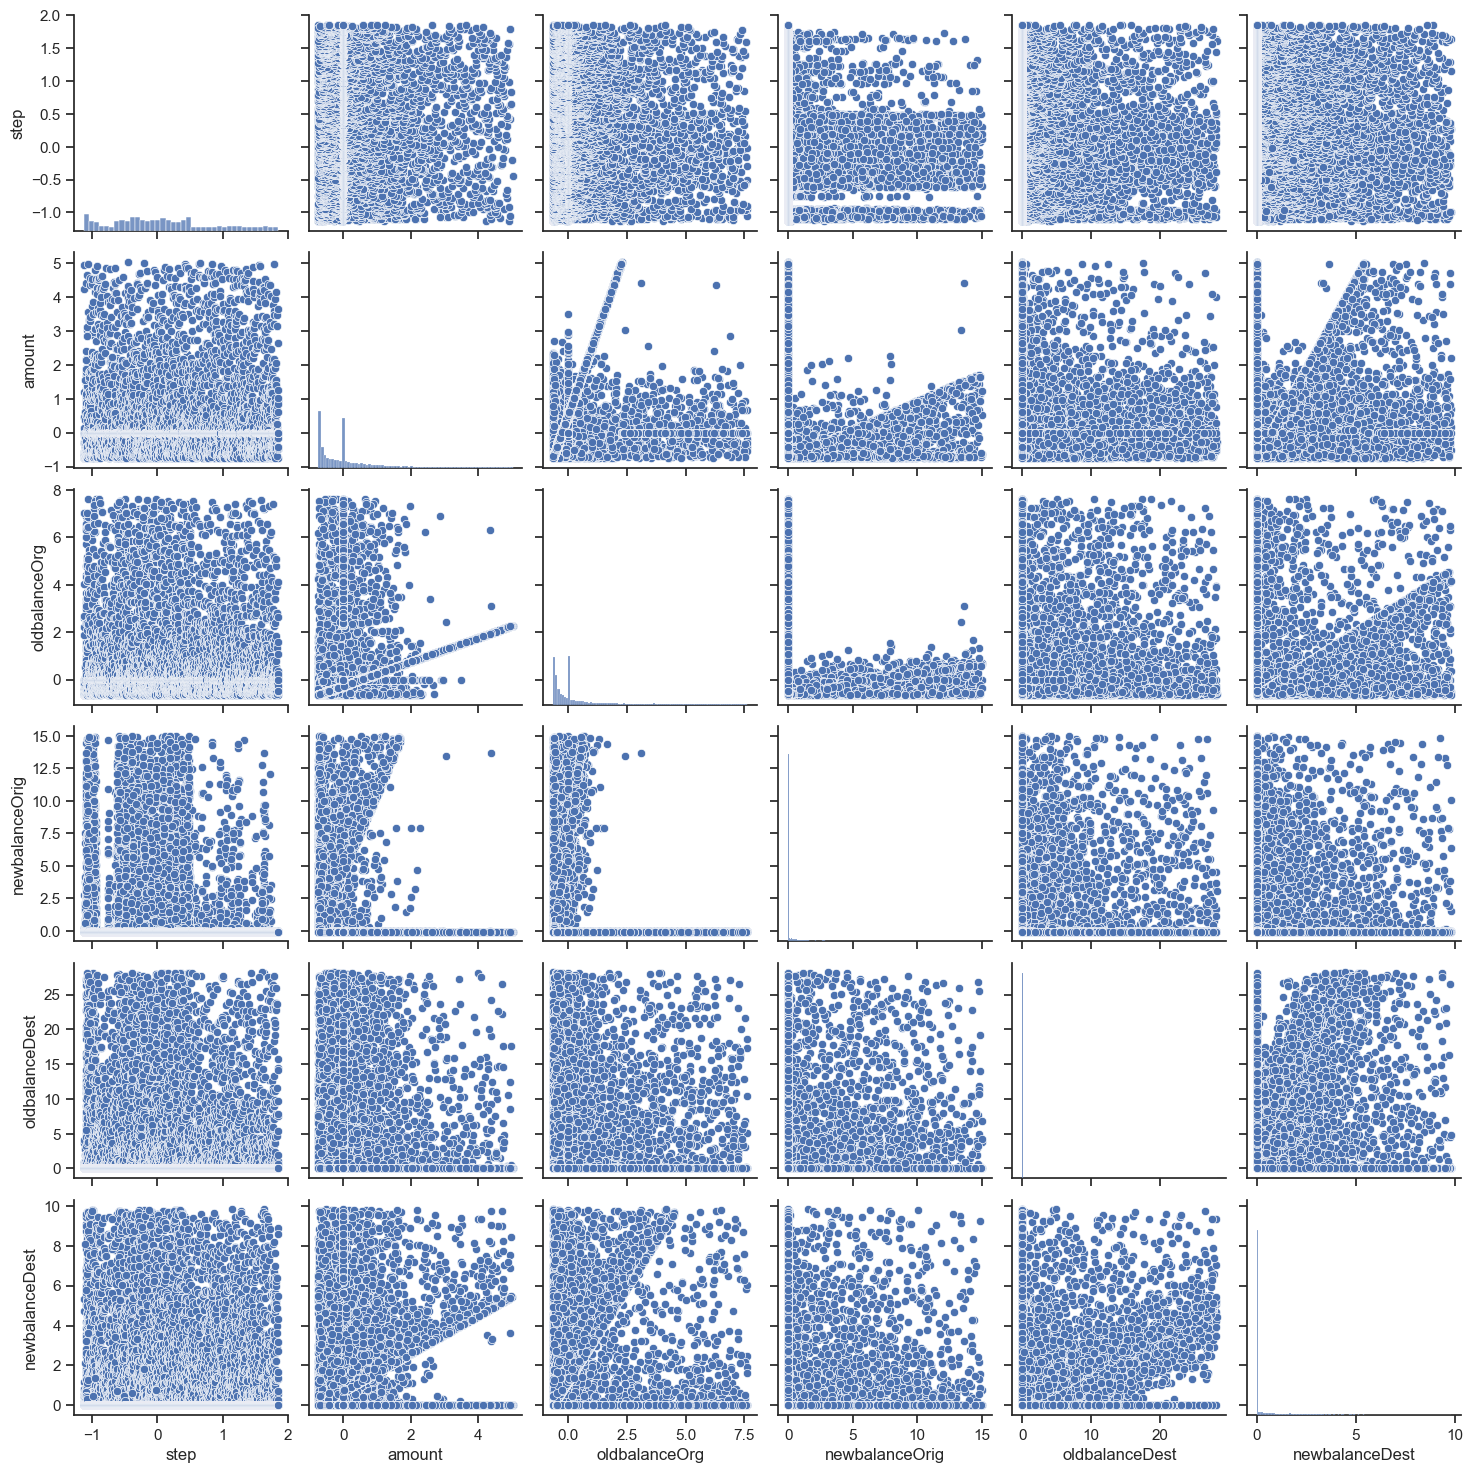

In [18]:
## inital pairplot visualisation to see overall dsitribution or relationship after cleaning
sns.set_theme(style="ticks")
sns.pairplot(df.loc[:,num_col])

## Split data intro train and test

In [19]:
# select dep and indep 
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values

# spplit into train test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=32) 

## Model 3A: Logistic Regression

In [20]:
## build logistic regression model: will take a while since we have over 6million records
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

## make prediction
y_pred = log_reg.predict(X_test)

In [21]:
# check accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98531211750306


In [22]:
## classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1628
           1       0.97      1.00      0.99      1640

    accuracy                           0.99      3268
   macro avg       0.99      0.99      0.99      3268
weighted avg       0.99      0.99      0.99      3268



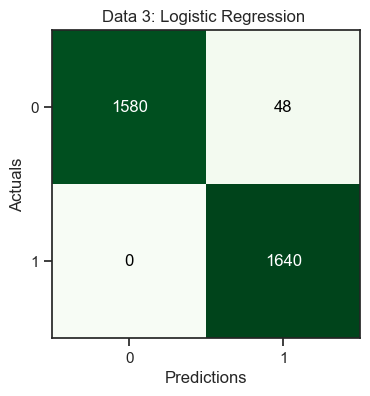

In [23]:
#confusion matrix

logr_conf_mat = confusion_matrix(y_test, y_pred)
logr_conf_mat

fig, ax = plot_confusion_matrix(conf_mat = logr_conf_mat , figsize = (4,4), cmap = 'Greens')
plt.xlabel('Predictions', fontsize = 12 )
plt.ylabel('Actuals', fontsize = 12 )
plt.title('Data 3: Logistic Regression ', fontsize = 12 )
plt.show()

AUC: 0.985258


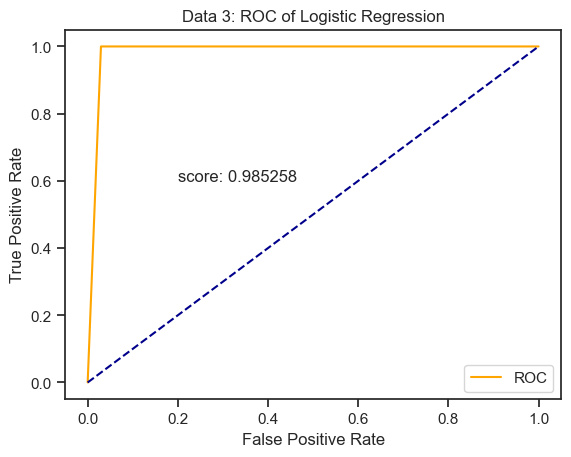

In [24]:
## Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)


fpr, tpr = roc_curve(y_test, y_pred)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Data 3: ROC of Logistic Regression')
plt.text(y= 0.6, x=0.2, s=f'score: {round(auc,6)}')
plt.legend()
plt.show()

## Conclusion

The accuracy at 98.5% is the lowest amongst the other 2 precedent models but the confusion matrix shows the model can recognise all fraudulent transactions. It has also detected 48 non-fraudulent transactions to be fraudulent which is better than not detecting fraudulent ones. It's better to be prevent.

The ROC is also at 0.9852 which means the model is good and the best amongst the previous ones.

## Model 3B: Naive Bayes

In [25]:
## import the libary 
from sklearn.naive_bayes import GaussianNB

In [26]:
## create naive bayes gaussian model
gaussian_model = GaussianNB()

## train our model
#dl takes a long time
gaussian_model.fit(X_train, y_train)

GaussianNB()

In [27]:
## make prediction
gm_y_pred = gaussian_model.predict(X_test) 

In [28]:
## get the result in dataframe
result = {'actual' : y_test, 'predicted_' : gm_y_pred}
result_df = pd.DataFrame(result)
result_df.head()

,actual,predicted_
0,0,1
1,1,1
2,0,0
3,0,1
4,1,1


In [29]:
## accuracy 
print('Accuracy:', metrics.accuracy_score(y_test, gm_y_pred))

Accuracy: 0.8341493268053856


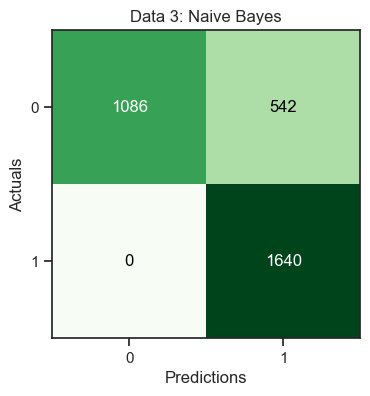

In [30]:
gm_conf_mat = confusion_matrix(y_test, gm_y_pred)

fig, ax = plot_confusion_matrix(conf_mat = gm_conf_mat , figsize = (4,4), cmap = 'Greens')
plt.xlabel('Predictions', fontsize = 12 )
plt.ylabel('Actuals', fontsize = 12 )
plt.title('Data 3: Naive Bayes', fontsize = 12 )
plt.show()

AUC: 0.833538


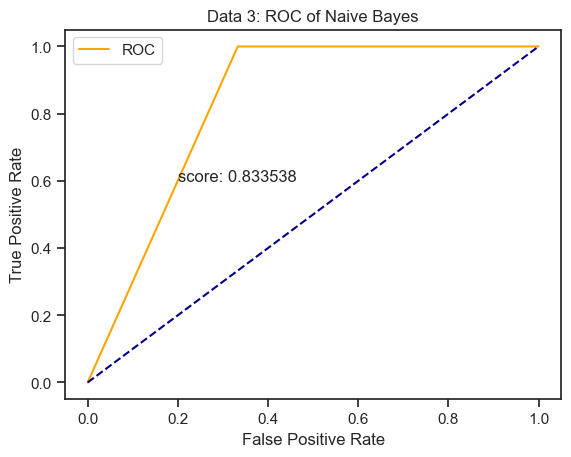

In [31]:
## Calculate AUC
gm_auc = roc_auc_score(y_test, gm_y_pred)
print('AUC: %f' %gm_auc)


fpr, tpr = roc_curve(y_test, gm_y_pred)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Data 3: ROC of Naive Bayes')
plt.text(y= 0.6, x=0.2, s=f'score: {round(gm_auc,6)}')
plt.legend()
plt.show()

## Conclusion

The Naives Bayes is less accurate than the logistic regression, with more predictions that are FP, and a lower ROC.

From here, I can try other models.

## Model 3c: ANN

In [32]:
#import libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

2023-06-23 14:38:48.897087: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
## initialise the simple neural network
model = Sequential() 

## input layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation =  'relu', input_dim = 11)) 

## hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation =  'relu'))

## regularisation -- help to stop overfitting
model.add(Dropout(0.25)) #0.25 = 25% random will be set to 0 during training

## output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation =  'sigmoid')) 

## compiling the ANN
model.compile(optimizer = 'adam', loss =  'binary_crossentropy', metrics=['accuracy']) 

In [34]:
## summary: information about shape, type and parameters of network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [35]:
## train our network
## 20% for testing, 25% for validation and 55% for training
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split =0.25 )

#loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0141 - val_accuracy: 0.9985


Epoch 1/10
307/307 [==============================] - 5s 5ms/step - loss: 0.4566 - accuracy: 0.8248 - val_loss: 0.2089 - val_accuracy: 0.9841
Epoch 2/10
307/307 [==============================] - 1s 3ms/step - loss: 0.1567 - accuracy: 0.9794 - val_loss: 0.0887 - val_accuracy: 0.9865
Epoch 3/10
307/307 [==============================] - 1s 3ms/step - loss: 0.1086 - accuracy: 0.9859 - val_loss: 0.0712 - val_accuracy: 0.9878
Epoch 4/10
307/307 [==============================] - 1s 4ms/step - loss: 0.0993 - accuracy: 0.9900 - val_loss: 0.0624 - val_accuracy: 0.9884
Epoch 5/10
307/307 [==============================] - 2s 5ms/step - loss: 0.0867 - accuracy: 0.9898 - val_loss: 0.0587 - val_accuracy: 0.9899
Epoch 6/10
307/307 [==============================] - 1s 4ms/step - loss: 0.0773 - accuracy: 0.9917 - val_loss: 0.0551 - val_accuracy: 0.9896
Epoch 7/10
307/307 [==============================] - 1s 4ms/step - loss: 0.0684 - accuracy: 0.9913 - val_loss: 0.0603 - val_accuracy: 0.9878
Epoch 

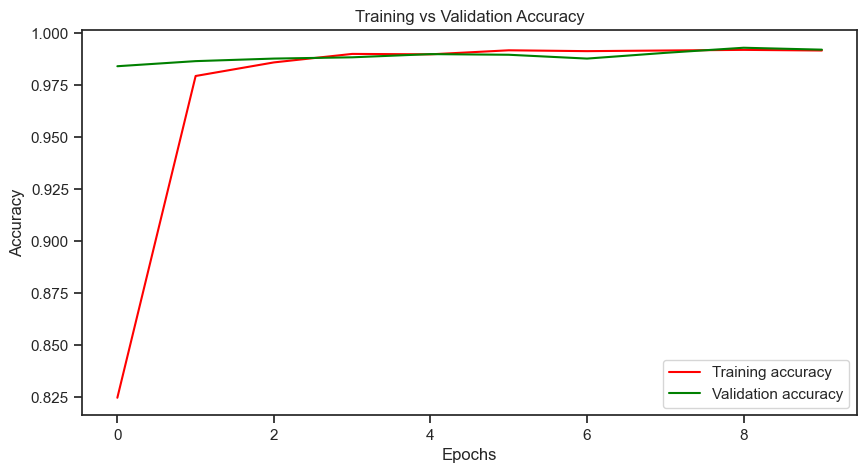

In [36]:
## does validation and training accuracy increase over time?
# 4 epochs are not google as validation accuracy is extremely low 

history_df= pd.DataFrame(history.history)

plt.figure(figsize=(10,5))
plt.plot(history_df.loc[:, ['accuracy']], color= 'red', label= 'Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], color= 'green', label= 'Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

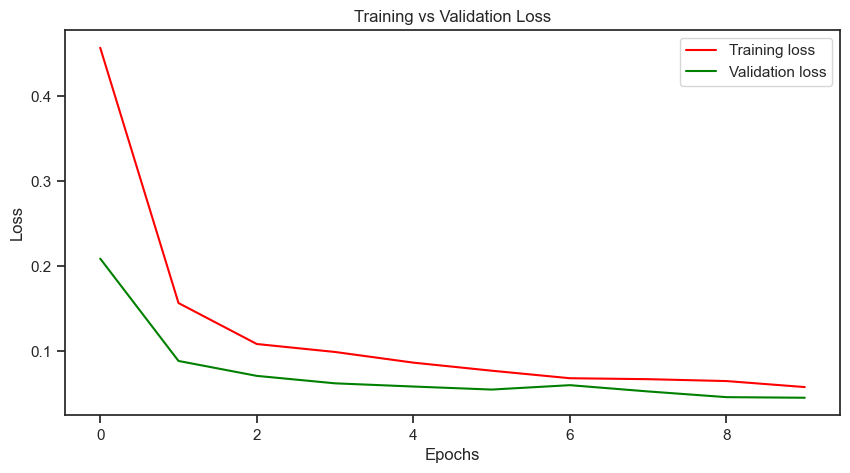

In [37]:
## does validation and training loss decrease over time?
# here 6 epochs would be best as they are at their lowest values
plt.figure(figsize=(10,5))
plt.plot(history_df.loc[:, ['loss']], color= 'red', label= 'Training loss')
plt.plot(history_df.loc[:, ['val_loss']], color= 'green', label= 'Validation loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
## save our model
model.save('ann_model1')

2023-06-23 14:39:22.912556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]
2023-06-23 14:39:23.136097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ann_model1/assets


INFO:tensorflow:Assets written to: ann_model1/assets


In [39]:
##load, saved model
model = tf.keras.models.load_model('ann_model1')

In [40]:
## predict X_test with model1
ann_y_pred = model.predict(X_test)
ann_y_pred

103/103 [==============================] - 0s 1ms/step


array([[8.1800570e-04],
       [9.9510497e-01],
       [1.3664901e-09],
       ...,
       [1.5026993e-06],
       [4.3119996e-07],
       [9.8211402e-01]], dtype=float32)

In [41]:
## cap value
ann_y_pred = np.where(ann_y_pred > 0.5, 1, 0) #anything above 0.5 make it 1, else 0
ann_y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [42]:
## classification report
print(classification_report(y_test, ann_y_pred)) #needs binary

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1628
           1       0.98      1.00      0.99      1640

    accuracy                           0.99      3268
   macro avg       0.99      0.99      0.99      3268
weighted avg       0.99      0.99      0.99      3268



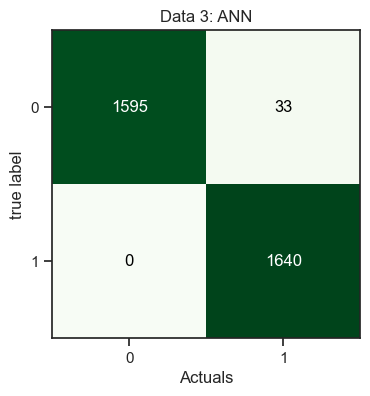

In [43]:
#confusion matrix
ann_conf_mat = confusion_matrix(y_test, ann_y_pred)

fig, ax = plot_confusion_matrix(conf_mat = ann_conf_mat , figsize = (4,4), cmap = 'Greens')
plt.xlabel('Predictions', fontsize = 12 )
plt.xlabel('Actuals', fontsize = 12 )
plt.title('Data 3: ANN', fontsize = 12 )
plt.show()

AUC: 0.989865


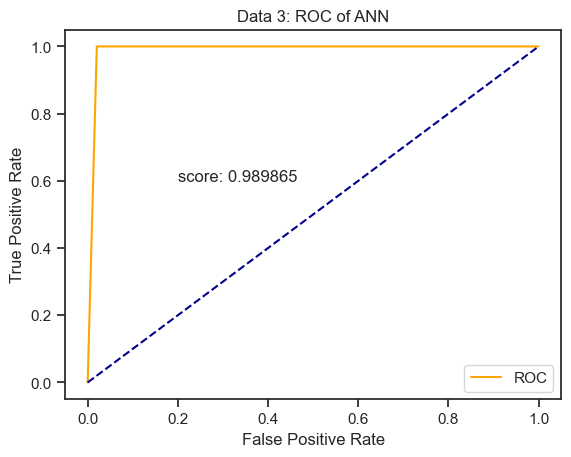

In [44]:
## CALCULATE AUC
ann_auc = roc_auc_score(y_test, ann_y_pred)
print('AUC: %f' %ann_auc)


fpr, tpr = roc_curve(y_test, ann_y_pred)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Data 3: ROC of ANN')
plt.text(y= 0.6, x=0.2, s=f'score: {round(ann_auc,6)}')
plt.legend()
plt.show()

## Conclusion 

The ANN is better than all 3 models. Even though, I haven't changed the hyparameters.

ANN Model 1: loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0141 - val_accuracy: 0.9985

Compared to the logistic regression, the ANN has predicted only 5 FP instead of the logistic regression predicting 11 FP. 
The ANN's ROC at 0.998464 is better than the logistic regresiion ROC at 0.985258.

<br>

Next actions I could take:\
-hyperparatune more the ANN\
-try more ML models on the other datasets\
-ask an expert for the mismatched transactions\
-try oversampling to maintain big dataset \
-keep the outliers as we are trying to detect anomalies so outliers \
-use samples of dataset for training and testing

Overall, I think the models such as ANN or logistic regression are good. 